# Linear regression on Real-Life data

### Importing libraries...

In [1]:
import numpy as np 
import pandas as pd

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set()

### Loading data

In [2]:
df  = pd.read_csv('Real-life example.csv')

In [3]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Exploring data

In [4]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


**The Model column contains too much unique values and so it will be dropped**

In [5]:
df = df.drop('Model', axis=1)
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [6]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

**Null values make up about 7% of our data thus they will be dropped.**

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


---
---

## Visualizations

---
### Checking for outliers
#### Price (target variable)

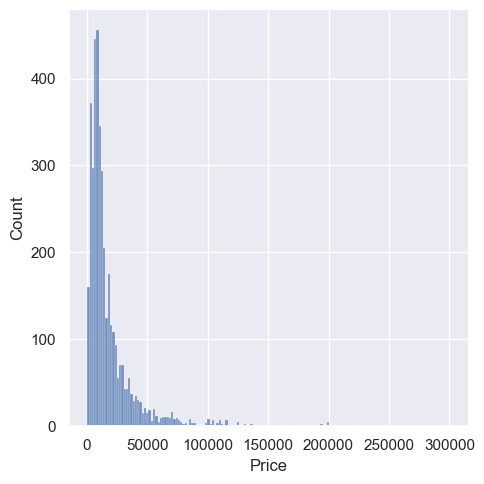

In [9]:
sns.displot(df['Price'])

**seeing as we have a lot of outliers and linear regression is extremely sensitive to those we will be removing the top 1% of data**

In [10]:
df = df[df['Price']<df['Price'].quantile(0.99)]

In [11]:
df['Price'].describe()

count      3984.000000
mean      17837.117460
std       18976.268315
min         600.000000
25%        6980.000000
50%       11400.000000
75%       21000.000000
max      129222.000000
Name: Price, dtype: float64

Although our data became less in number but its quality has increased as now our model will avoid overfitting to fit the outliers we had

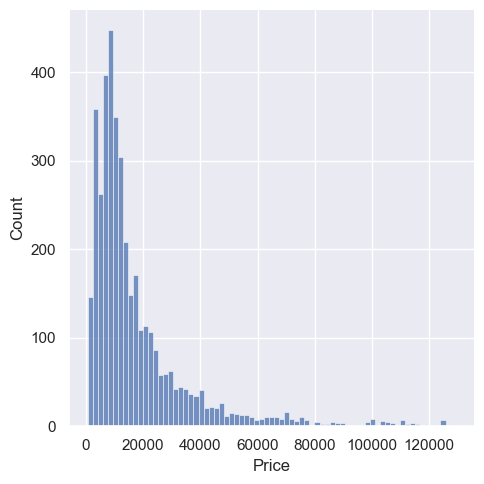

In [12]:
sns.displot(df['Price'])

---

#### Year

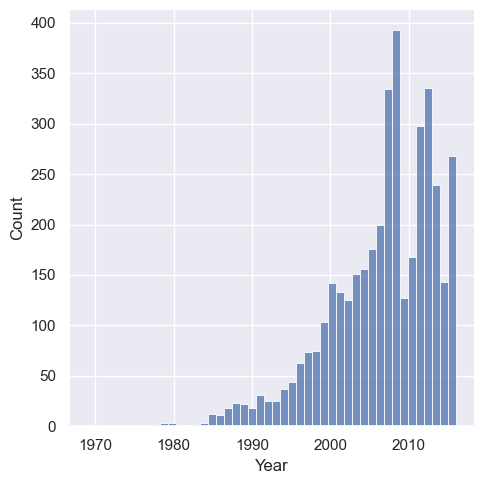

In [13]:
sns.displot(df['Year'])

**Most of the cars we have in our data are produced between the years of 2006 and 2013 and we have extreme outliers from early years we will aslo remove those**

In [14]:
df = df[df['Year']>df['Year'].quantile(0.01)]

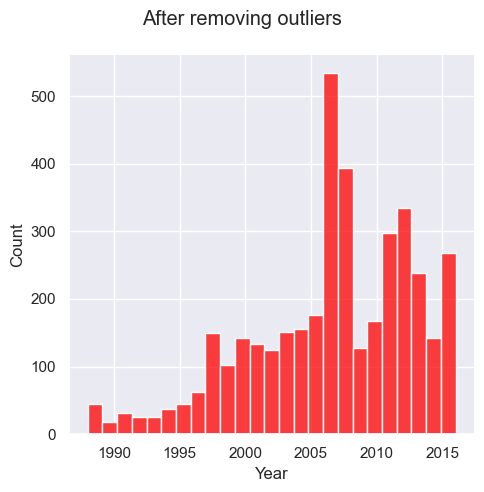

In [15]:
plot = sns.displot(df['Year'], color='red')
plot.fig.suptitle('After removing outliers')
plt.tight_layout()

****

#### Mileage

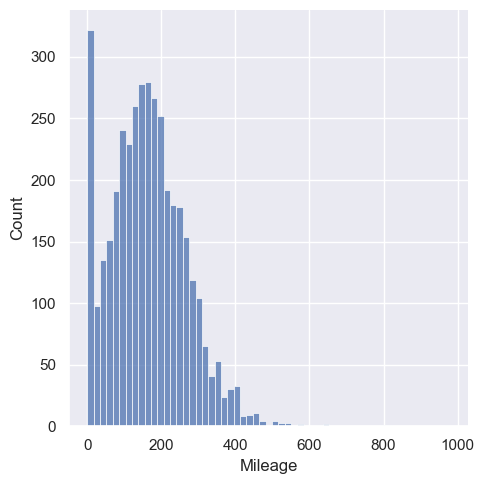

In [16]:
sns.displot(df['Mileage'])

milage also seems to have the same problem so we will follow the same procedures

In [17]:
df = df[df['Mileage']<df['Mileage'].quantile(0.99)]

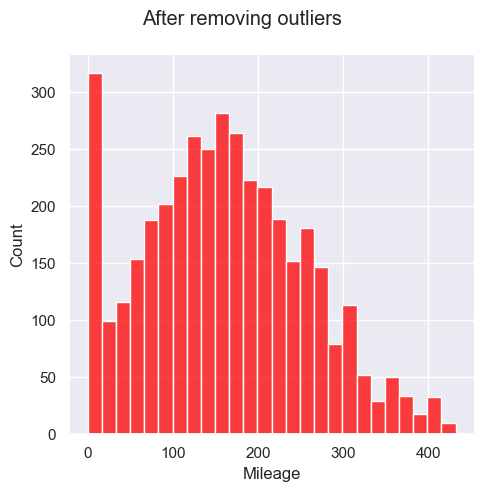

In [18]:
plot = sns.displot(df['Mileage'], color='red')
plot.fig.suptitle('After removing outliers')
plt.tight_layout()

---

#### Engine volume (EngineV)

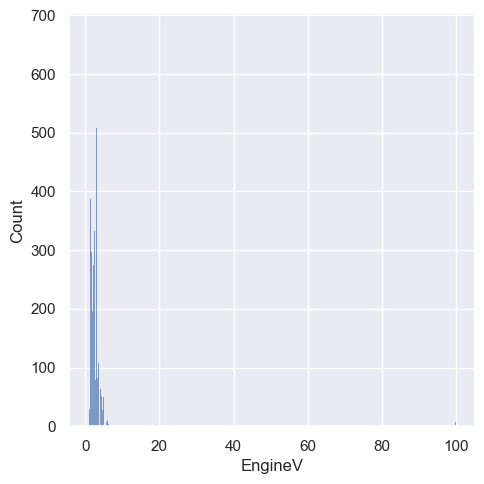

In [19]:
sns.displot(df['EngineV'])

In [20]:
sorted(df['EngineV'].unique())

[0.6,
 0.65,
 1.0,
 1.1,
 1.2,
 1.3,
 1.33,
 1.39,
 1.4,
 1.46,
 1.5,
 1.59,
 1.6,
 1.7,
 1.79,
 1.8,
 1.9,
 2.0,
 2.1,
 2.14,
 2.15,
 2.17,
 2.2,
 2.3,
 2.4,
 2.5,
 2.57,
 2.6,
 2.7,
 2.8,
 2.9,
 2.98,
 2.99,
 3.0,
 3.2,
 3.5,
 3.6,
 3.7,
 3.8,
 4.0,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 5.0,
 5.2,
 5.46,
 5.5,
 5.7,
 6.0,
 6.2,
 6.3,
 6.5,
 7.2,
 9.0,
 15.0,
 19.0,
 20.0,
 22.0,
 28.0,
 30.0,
 55.0,
 66.0,
 74.0,
 75.0,
 90.0,
 99.99]

we have a very strange value of 99.9 which isnt exactly a possible number because its either the engine has so mnay cylinders for a car or the cylinders are extremly huge which either is possible (https://en.wikipedia.org/wiki/Engine_displacement). Infact a truck has the volume of 6.5 so we will drop any value higher than that.

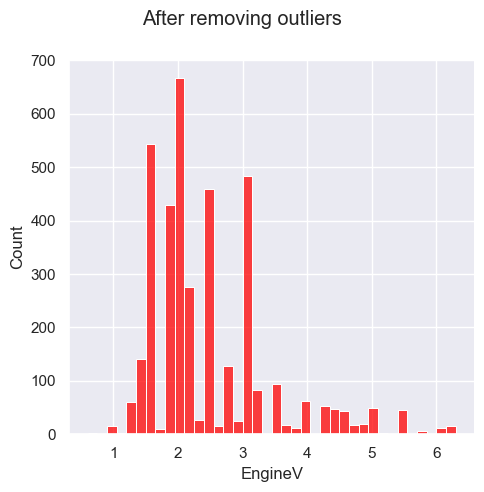

In [21]:
df = df[df['EngineV']<6.5]

plot = sns.displot(df['EngineV'], color='red')
plot.fig.suptitle('After removing outliers')
plt.tight_layout()

---

### Linearity between numerical variables and target variable

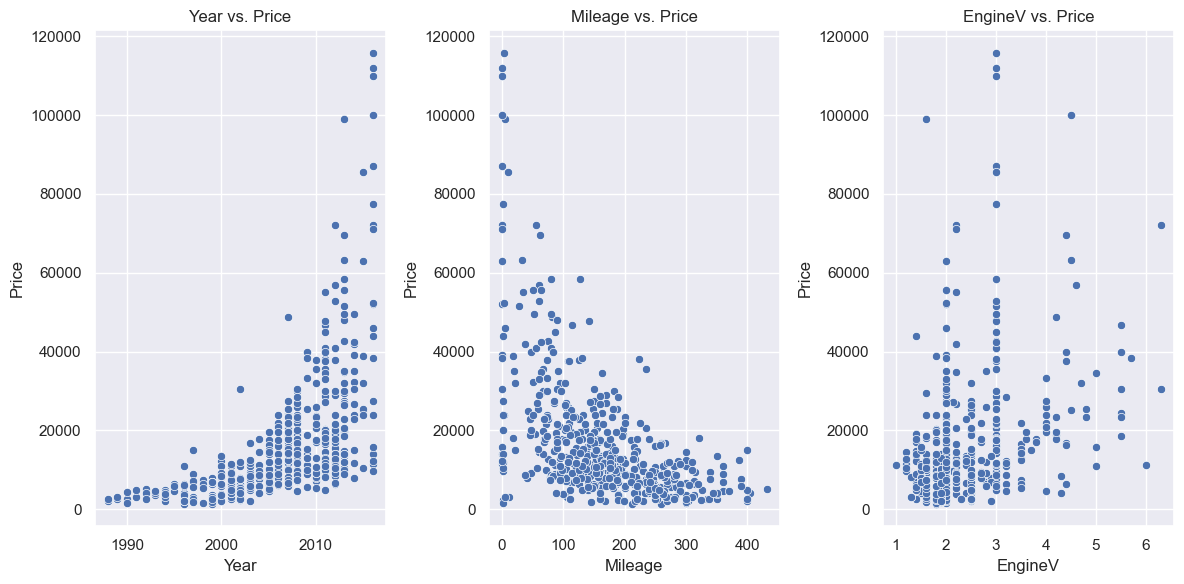

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12,6))

sample = df.sample(500) # for noise reduction

# Year vs. Price
sns.scatterplot(ax=axes[0], data= sample, x='Year', y='Price')
axes[0].set_title('Year vs. Price')

# Mileage vs. Price
sns.scatterplot(ax=axes[1], data= sample, x='Mileage', y='Price')
axes[1].set_title('Mileage vs. Price')

# EngineV vs. Price
sns.scatterplot(ax=axes[2], data= sample, x='EngineV', y='Price')
axes[2].set_title('EngineV vs. Price')
plt.tight_layout()

we can see the non linear pattern in both year and mileage because our price values arent normally distributed. we can fix that with a log transformation

In [23]:
df['log price']= np.log(df['Price'])
sample['log price'] = np.log(sample['Price'])
# we will also drop the price column
df = df.drop('Price', axis=1)

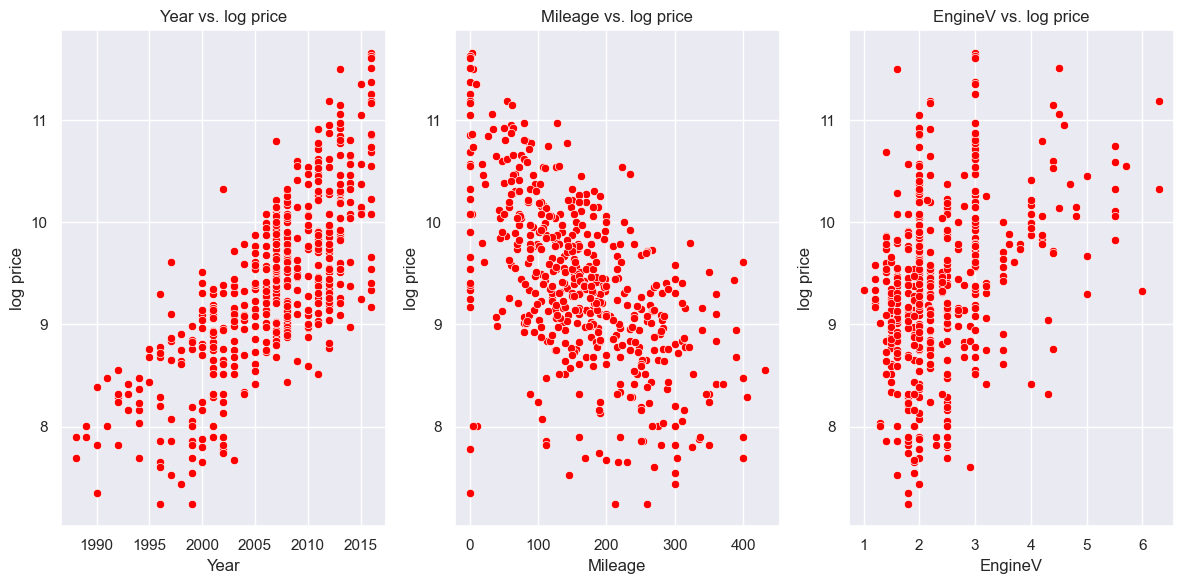

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12,6))

# Year vs. Price
sns.scatterplot(ax=axes[0], data= sample, x='Year', y='log price', color='red')
axes[0].set_title('Year vs. log price')

# Mileage vs. Price
sns.scatterplot(ax=axes[1], data= sample, x='Mileage', y='log price', color='red')
axes[1].set_title('Mileage vs. log price')

# EngineV vs. Price
sns.scatterplot(ax=axes[2], data= sample, x='EngineV', y='log price', color='red')
axes[2].set_title('EngineV vs. log price')
plt.tight_layout()

now we can see a more linear pattern

---
**CHECKING FOR MULTICOLLINEARITY**

interactions between independent variables can cause our regression to have unstable coefficient estimates which is why we need to check this assumption
- We can assume that year and mileage are somewhat correlated as the longer the car has existed the more likely it is to have a large mileage


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Year', 'Mileage', 'EngineV']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [26]:
vif

,VIF,features
0,10.361600,Year
1,3.797050,Mileage
2,7.658673,EngineV


**a vif below 10 is acceptable however the Year variable seems to be too correlated with the other variables therefore we will drop it as an extra measure**

In [27]:
df = df.drop('Year', axis=1)

---
---
## Preprocessing

In [28]:
df.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [29]:
df.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log price
count,3865,3865,3865.000000,3865.000000,3865,3865,3865.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,847,1466,NaN,NaN,1806,3504,NaN
mean,NaN,NaN,160.401035,2.450259,NaN,NaN,9.416241
std,NaN,NaN,95.455403,0.949535,NaN,NaN,0.876475
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,9.985068


creating dummies for categorical variables...

In [30]:
data = pd.get_dummies(df, drop_first=True)
data.head()

,Mileage,EngineV,log price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [31]:
X = data.drop('log price', axis=1)
y = data['log price']

standarizing...

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
X

array([[ 1.22166004, -0.47424997,  2.27901519, ..., -0.16213525,
         1.33288426,  0.32097525],
       [ 2.79327781,  0.47370493, -0.43878602, ..., -0.16213525,
        -0.75025269,  0.32097525],
       [ 2.07033364,  2.6855997 , -0.43878602, ..., -0.16213525,
        -0.75025269,  0.32097525],
       ...,
       [-1.58629705,  0.57903325, -0.43878602, ..., -0.16213525,
        -0.75025269,  0.32097525],
       [-1.67011666,  1.10567486,  2.27901519, ..., -0.16213525,
         1.33288426,  0.32097525],
       [-0.38139009, -0.47424997, -0.43878602, ..., -0.16213525,
        -0.75025269,  0.32097525]])

splitting...

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## MODEL

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
coef_df = pd.DataFrame(data.drop('log price', axis=1).columns.values, columns=['Features'])
coef_df['Weights'] = lr.coef_
coef_df

,Features,Weights
0,Mileage,-0.465320
1,EngineV,0.211496
2,Brand_BMW,0.023714
3,Brand_Mercedes-Benz,0.015230
4,Brand_Mitsubishi,-0.142128
5,Brand_Renault,-0.179243
6,Brand_Toyota,-0.059978
7,Brand_Volkswagen,-0.091072
8,Body_hatch,-0.142203
9,Body_other,-0.094781


In [37]:
lr.intercept_

9.41988234766653

## Evaluation

Text(0, 0.5, 'Predictions')

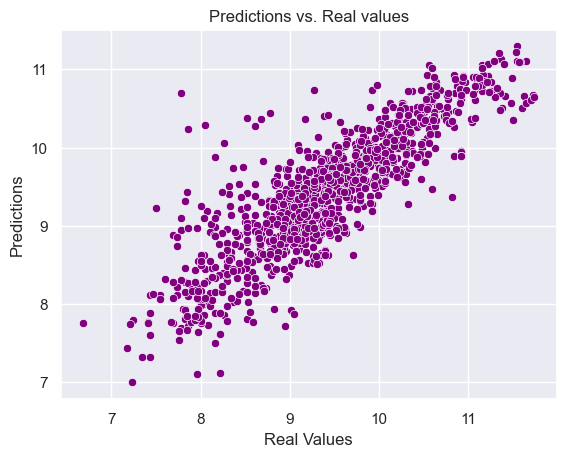

In [38]:
predictions = lr.predict(X_test)

sns.scatterplot(x = y_test, y = predictions, color='purple')

plt.title('Predictions vs. Real values')
plt.xlabel('Real Values')
plt.ylabel('Predictions')

Checking if residuals are normally distributed as one of the regression assumptions is that errors are normally distributed and we can estimate errors with residuals

Text(0.5, 1.0, 'Residuals PDF')

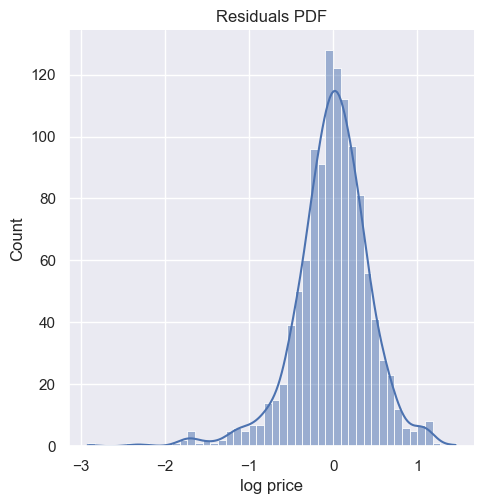

In [39]:
sns.displot(y_test - predictions, kde=True)
plt.title('Residuals PDF')

we conclude we did a good job with the data cleaning and preprocessing as the mean is 0. From the left tail we can also conclude that our model tends to overestimate some values which leaves room for improvment in our model. 

In [40]:
lr.score(X_train, y_train)

0.756164438692788

the r score shows that we managed to explain 75% of the variance

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('our mean absolute error is:', mean_absolute_error(predictions, y_test))
print('our mean squared error is:', mean_squared_error(predictions, y_test))
print('our root mean squared error is:', mean_squared_error(predictions, y_test)**(1/2))

our mean absolute error is: 0.3232332333390139
our mean squared error is: 0.20223037152880605
our root mean squared error is: 0.44970031301835456
